<a href="https://colab.research.google.com/github/carol-furtado/WEC-competiton/blob/main/WEC_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Predicting Blueberry Yield Using Supervised Regression Models – A Kaggle ML League Challenge

In [2]:
#first import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, StackingRegressor



#####Loading the competion data into the notebook

In [3]:
from google.colab import files
files.upload() #upload the downloaded kaggle.json file when prompted

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"carolmikhail","key":"498ab6090070f5847cbaf77287adb2ce"}'}

In [4]:
#setting permissions
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
#downloading the dataset
!kaggle competitions download -c ml-league-supervised-learning-competition

  0% 0.00/676k [00:00<?, ?B/s]
100% 676k/676k [00:00<00:00, 946MB/s]


In [6]:
#unzipping the file
!unzip ml-league-supervised-learning-competition.zip -d data/

Archive:  ml-league-supervised-learning-competition.zip
  inflating: data/sample_submission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          


#####Applying certain simple functions on the data to learn more about it

In [7]:
#loading the file
sample_train_data=pd.read_csv('data/train.csv')
sample_test_data=pd.read_csv('data/test.csv')


In [9]:
#displaying the first five rows of training dataset
sample_train_data.head()


,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,683.0,25.0,0.50,0.38,0.38,0.75,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.383582,0.399556,30.546306,3923.90628
1,1,330.0,12.5,0.25,0.25,0.75,0.63,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.480073,0.448973,35.598217,5596.22636
2,2,155.0,12.5,0.25,0.25,0.38,0.38,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.594206,0.495898,41.059194,7406.90248
3,3,293.0,12.5,0.25,0.25,0.63,0.50,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.572046,0.486486,39.773462,7270.31832
4,4,343.0,12.5,0.25,0.25,0.75,0.75,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.532304,0.460322,37.209554,6132.99793


In [10]:
#displaying the last 5 rows of training dataset
sample_train_data.tail()

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
14995,14995,58.0,12.5,0.25,0.25,0.38,0.25,69.7,42.1,58.2,50.2,24.3,41.2,1.0,0.10,0.385022,0.372179,29.248678,4016.36160
14996,14996,340.0,12.5,0.25,0.25,0.75,0.75,69.7,42.1,58.2,50.2,24.3,41.2,1.0,0.10,0.620392,0.528322,43.242047,8013.62631
14997,14997,722.0,25.0,0.50,0.38,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.619888,0.512639,45.069192,8413.65966
14998,14998,367.0,12.5,0.25,0.38,0.38,0.50,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.582491,0.492820,41.176421,7183.10038
14999,14999,167.0,12.5,0.25,0.25,0.38,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.506190,0.455614,36.148782,5747.56017


In [11]:
#removing the column 'id' from both train and test datasets
id= sample_train_data['id']
id_test=sample_test_data['id']
final_sample_train_data=sample_train_data.drop(['id'],axis=1)

final_sample_test_data=sample_test_data.drop(['id'],axis=1)

In [12]:
#finding out whether there are any null values in the training dataset
final_sample_train_data.isnull().sum()

,0
Row#,0
clonesize,0
honeybee,0
bumbles,0
andrena,0
osmia,0
MaxOfUpperTRange,0
MinOfUpperTRange,0
AverageOfUpperTRange,0
MaxOfLowerTRange,0


In [13]:
#finding number of data points and number of features in training data
final_sample_train_data.shape

(15000, 18)

In [14]:
#describing training data set
final_sample_train_data.describe()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,425.401667,19.839650,0.388164,0.283306,0.486137,0.590437,82.225280,49.706467,68.703440,59.266920,28.679893,48.600793,18.795525,0.327030,0.499020,0.445017,35.999411,5992.770342
std,215.091453,6.676577,0.345423,0.058527,0.149795,0.147317,9.109746,5.522788,7.610237,6.583907,3.182278,5.368383,11.837961,0.166279,0.077344,0.038247,4.115489,1356.343165
min,0.000000,12.500000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,45.800000,24.300000,41.200000,1.000000,0.060000,0.163671,0.207564,22.079199,1637.704020
25%,244.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.450103,0.417909,33.221987,5046.457340
50%,468.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.502980,0.445494,35.923314,6075.959845
75%,596.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.559325,0.471189,38.848807,7007.668250
max,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,34.000000,55.900000,34.000000,0.560000,0.867539,0.631790,46.369344,8969.401840


In [15]:
#obtaining some information on the training dataset
final_sample_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  15000 non-null  float64
 1   clonesize             15000 non-null  float64
 2   honeybee              15000 non-null  float64
 3   bumbles               15000 non-null  float64
 4   andrena               15000 non-null  float64
 5   osmia                 15000 non-null  float64
 6   MaxOfUpperTRange      15000 non-null  float64
 7   MinOfUpperTRange      15000 non-null  float64
 8   AverageOfUpperTRange  15000 non-null  float64
 9   MaxOfLowerTRange      15000 non-null  float64
 10  MinOfLowerTRange      15000 non-null  float64
 11  AverageOfLowerTRange  15000 non-null  float64
 12  RainingDays           15000 non-null  float64
 13  AverageRainingDays    15000 non-null  float64
 14  fruitset              15000 non-null  float64
 15  fruitmass          

#####Understanding the correlation between the features of the datset


<Axes: >

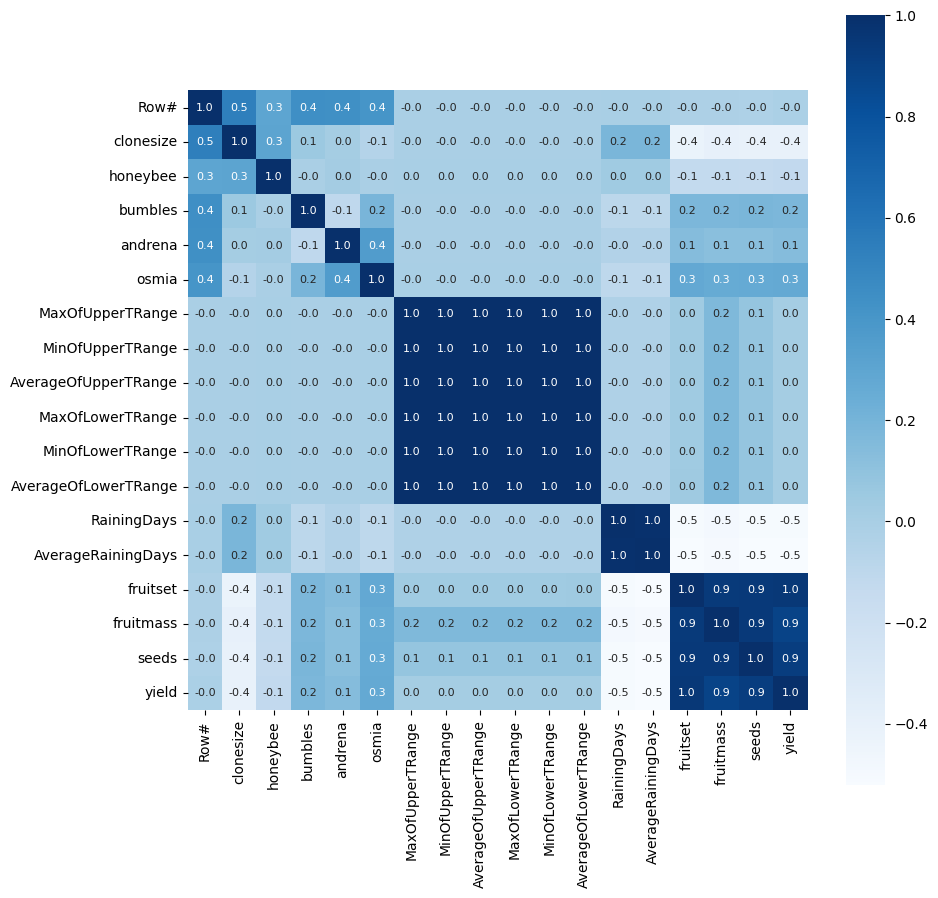

In [16]:

correlation_train_data=final_sample_train_data.corr()
#constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation_train_data,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

#####Splitting the dataset , into x(contains all the features) and y(contains the target column)

In [17]:
x=final_sample_train_data.drop(['yield'],axis=1)
y=final_sample_train_data['yield']
x_test=final_sample_test_data


#####Model Training using XGBoost Regressor

In [45]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 13.8 MB/s eta 0:00:00


In [53]:
import optuna
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

def objective(trial):
    # Suggest values for hyperparameters
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'random_state': 42
    }

    model = XGBRegressor(**param)

    # Cross-validation or a manual split
    score = cross_val_score(model, x,y,cv=3, scoring='neg_mean_absolute_error')

    return -score.mean()  # we want to minimize MAE

In [70]:
study = optuna.create_study(direction='minimize')  # minimize error
study.optimize(objective, n_trials=50)

[I 2025-06-07 19:20:48,820] A new study created in memory with name: no-name-8ead5dbe-a9dd-46f0-8f9a-e1288a8143e6
[W 2025-06-07 19:20:53,927] Trial 0 failed with parameters: {'n_estimators': 217, 'max_depth': 10, 'learning_rate': 0.17527927474519428, 'subsample': 0.6924306175825068, 'colsample_bytree': 0.6008365548901947} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "<ipython-input-53-b4efd5d3ef2e>", line 22, in objective
    score = cross_val_score(model, x,y,cv=3, scoring='neg_mean_absolute_error')
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/p

KeyboardInterrupt: 

In [56]:
print("Best hyperparameters:", study.best_params)

Best hyperparameters: {'n_estimators': 350, 'max_depth': 3, 'learning_rate': 0.06784802683755564, 'subsample': 0.6906766534098561, 'colsample_bytree': 0.8024331022437039}


In [57]:
#loading the model
model = XGBRegressor(n_estimators=350,
    learning_rate=0.06784802683755564,
    max_depth=3,
    colsample_bytree=0.8024331022437039,
    subsample=0.6906766534098561,
    random_state=42)
model.fit(x,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8024331022437039, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.06784802683755564, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=350, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

#####Evaluating the model with training data

In [59]:
#accuracy of prediction on training data
training_data_prediction=model.predict(x)
print(training_data_prediction)

[3994.0947 5560.441  7422.372  ... 8348.785  7416.0596 6458.4185]


In [60]:
print(training_data_prediction[:15000])

[3994.0947 5560.441  7422.372  ... 8348.785  7416.0596 6458.4185]


In [61]:
#checking the Rsquared error
error_score_1=metrics.r2_score(y,training_data_prediction)
print("R squared error : ",error_score_1)



R squared error :  0.9332859495045435


In [62]:
#checking Mean absolute error
error_score_2=metrics.mean_absolute_error(y,training_data_prediction)
print("Mean absolute error : ",error_score_2)

Mean absolute error :  234.41812586492188


#####Error comes out to be around 1.6%

In [63]:
predictions_train_df = pd.DataFrame({
    'id': id,
    'yield': training_data_prediction,

})
print(predictions_train_df)

          id        yield
0          0  3994.094727
1          1  5560.440918
2          2  7422.372070
3          3  7278.005859
4          4  6468.446289
...      ...          ...
14995  14995  4185.815918
14996  14996  8237.444336
14997  14997  8348.785156
14998  14998  7416.059570
14999  14999  6458.418457

[15000 rows x 2 columns]


In [64]:
predictions_train_series = pd.Series(training_data_prediction, name='predicted_yield')

In [25]:
predictions_train_df.to_csv('predictions_train_series.csv', index=None)

In [52]:
from google.colab import files
files.download('predictions_train_series.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#####Evaluating the model with testing data


In [65]:
#accuracy of prediction on testing data
testing_data_prediction=model.predict(x_test)
print(testing_data_prediction)

[5486.7095 6435.467  5528.4194 ... 5568.959  6483.2646 6559.452 ]


In [66]:
predictions_test_df = pd.DataFrame({
    'id': id_test,
    'yield': testing_data_prediction,

})
print(predictions_test_df)

         id        yield
0     15000  5486.709473
1     15001  6435.466797
2     15002  5528.419434
3     15003  3024.217041
4     15004  3369.387207
...     ...          ...
9995  24995  5654.297363
9996  24996  5697.243164
9997  24997  5568.958984
9998  24998  6483.264648
9999  24999  6559.452148

[10000 rows x 2 columns]


In [67]:
predictions_test_series = pd.Series(testing_data_prediction, name='predicted_yield')

In [68]:
predictions_test_df.to_csv('predictions_test_series.csv', index=None)

In [69]:
from google.colab import files
files.download('predictions_test_series.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>